**File Name:** KariScience_withSTKWrapper.ipynb<br>
**Purpose:** Test capability to bypass STK when running Travis-CI<br>
**Author:** Emmie King (Emmie@SEE.com)<br>
**Project:** B612 - Asteroid Institute<br>
**NDA/ITAR:** None<br>
**Input:** Summary_Report.csv from KARI_ScienceOrbit 100 km -75x75.ipynb STK jupyter notebook. Size: 9x5 <br>
 - LAN (deg)  
 - Number Maneuvers  
 - Total Delta V (m/s)  
 - Mean Delta V (m/s)
 - Standard Deviation (m/s)

**Output:** None <br>
**Notes:** Travis-CI is run on a Linux platfrom. STK requires Windows and a license for the virtual environment. <br>
We are running STK and saving the output into a Summary_Report.csv file. We are testing the csv file on Windows<br>
and with Travis-CI.


In [66]:
import sys, os
from os.path import expanduser
import platform
import psutil
import pandas
import doctest
from pandas.util.testing import assert_frame_equal

Root directory path:  C:\Users\macuser\TestingTravisCI\adam_home
C:/Users/macuser/SEE_bitbucket/see-python/notebooks/KARI_ScienceOrbit/KARI Station Keeping Maneuver Analysis/StationKeepingManeuver.sc
Initial State:
Element Type: Keplerian
Epoch 22 Jan 2021 20:14:47.130 UTC
SMA   1836.5000000000027 km
ECC   0.015000000000000008 km
INC   89.7 deg
LAN   7.369547890803197e-10 deg
LAN   159.99999999999955 deg
 TA   7.69694232914171e-13 deg
Started run: 2019-03-29 12:05:40.055940
Running LAN = 0.0
Number of Maneuvers: 12
Total Delta-V: 122.07501852581495 (m/s)
Mean Delta-V: 10.172918210484578 (m/s)
Standard Deviation of Delta-V: 1.2690711094930398 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,27 Mar 2021 04:39:01.755483728,9.625101
1,2,Sequence0.Target_Sequence.Mnvr_2,27 Mar 2021 07:40:38.221981610,9.469609
2,3,Sequence1.Target_Sequence.Mnvr_1,17 Jun 2021 02:39:07.958884917,10.767998
3,4,Sequence1.Target_Sequence.Mnvr_2,17 Jun 2021 05:39:49.638422567,10.698266
4,5,Sequence2.Target_Sequence.Mnvr_1,7 Sep 2021 02:52:49.556857441,10.687506
5,6,Sequence2.Target_Sequence.Mnvr_2,7 Sep 2021 05:53:24.743626080,10.609622
6,7,Sequence3.Target_Sequence.Mnvr_1,28 Nov 2021 03:19:26.915639970,10.640822
7,8,Sequence3.Target_Sequence.Mnvr_2,28 Nov 2021 06:19:56.026051842,10.548710
8,9,Sequence4.Target_Sequence.Mnvr_1,2 Mar 2022 00:31:31.503978692,11.577826
9,10,Sequence4.Target_Sequence.Mnvr_2,2 Mar 2022 03:33:31.342384979,11.775872


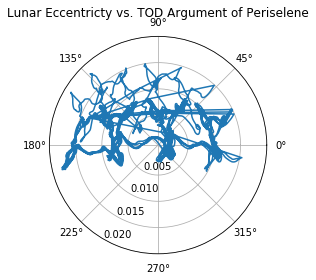

Current Time: 2019-03-29 12:30:07.818784; Elapsed Time: 24.462714066666667 minutes
Running LAN = 45.0
Number of Maneuvers: 12
Total Delta-V: 102.43230983088755 (m/s)
Mean Delta-V: 8.53602581924063 (m/s)
Standard Deviation of Delta-V: 3.6185199537365507 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,23 Feb 2021 21:29:18.211401409,4.755094
1,2,Sequence0.Target_Sequence.Mnvr_2,24 Feb 2021 00:29:06.051129016,4.580299
2,3,Sequence1.Target_Sequence.Mnvr_1,10 May 2021 03:59:48.235867525,12.039766
3,4,Sequence1.Target_Sequence.Mnvr_2,10 May 2021 07:01:33.712728066,11.742816
4,5,Sequence2.Target_Sequence.Mnvr_1,13 Jun 2021 12:47:41.326089775,5.404235
5,6,Sequence2.Target_Sequence.Mnvr_2,13 Jun 2021 15:49:02.739750413,5.169312
6,7,Sequence3.Target_Sequence.Mnvr_1,27 Aug 2021 13:04:52.972848166,12.207523
7,8,Sequence3.Target_Sequence.Mnvr_2,27 Aug 2021 16:08:15.501052625,11.930023
8,9,Sequence4.Target_Sequence.Mnvr_1,30 Sep 2021 14:43:36.340661719,5.177146
9,10,Sequence4.Target_Sequence.Mnvr_2,30 Sep 2021 17:45:03.391488519,5.396280


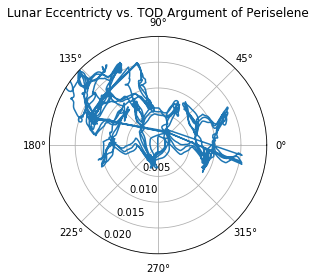

Current Time: 2019-03-29 12:51:57.420799; Elapsed Time: 46.289414316666665 minutes
Running LAN = 90.0
Number of Maneuvers: 12
Total Delta-V: 102.69876295381972 (m/s)
Mean Delta-V: 8.558230246151643 (m/s)
Standard Deviation of Delta-V: 3.4934265625506202 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,27 Feb 2021 19:46:48.386012572,5.538159
1,2,Sequence0.Target_Sequence.Mnvr_2,27 Feb 2021 22:48:50.659839544,5.460147
2,3,Sequence1.Target_Sequence.Mnvr_1,13 May 2021 08:52:06.078437027,11.709841
3,4,Sequence1.Target_Sequence.Mnvr_2,13 May 2021 11:54:52.281977568,11.897231
4,5,Sequence2.Target_Sequence.Mnvr_1,17 Jun 2021 08:41:55.681303035,5.239062
5,6,Sequence2.Target_Sequence.Mnvr_2,17 Jun 2021 11:43:09.922091523,4.972282
6,7,Sequence3.Target_Sequence.Mnvr_1,30 Aug 2021 19:52:29.168211941,12.005246
7,8,Sequence3.Target_Sequence.Mnvr_2,30 Aug 2021 22:55:46.746982090,11.748340
8,9,Sequence4.Target_Sequence.Mnvr_1,4 Oct 2021 08:39:40.581313625,5.169422
9,10,Sequence4.Target_Sequence.Mnvr_2,4 Oct 2021 11:40:48.633126482,4.935240


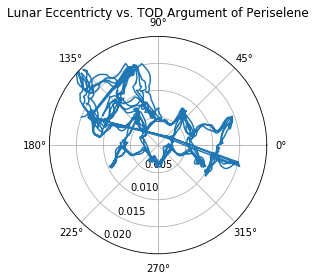

Current Time: 2019-03-29 13:17:44.558215; Elapsed Time: 72.07503791666666 minutes
Running LAN = 135.0
Number of Maneuvers: 12
Total Delta-V: 128.9202748885952 (m/s)
Mean Delta-V: 10.743356240716267 (m/s)
Standard Deviation of Delta-V: 0.6032975504692993 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,9 Mar 2021 16:57:52.039022949,9.386089
1,2,Sequence0.Target_Sequence.Mnvr_2,9 Mar 2021 19:59:22.376339028,9.597536
2,3,Sequence1.Target_Sequence.Mnvr_1,30 May 2021 11:43:59.232356774,10.876984
3,4,Sequence1.Target_Sequence.Mnvr_2,30 May 2021 14:44:41.688003078,11.229749
4,5,Sequence2.Target_Sequence.Mnvr_1,20 Aug 2021 07:13:04.235681288,11.160329
5,6,Sequence2.Target_Sequence.Mnvr_2,20 Aug 2021 10:13:42.290281869,11.058496
6,7,Sequence3.Target_Sequence.Mnvr_1,10 Nov 2021 01:01:54.530321896,11.121110
7,8,Sequence3.Target_Sequence.Mnvr_2,10 Nov 2021 04:02:26.371765845,11.007306
8,9,Sequence4.Target_Sequence.Mnvr_1,30 Jan 2022 03:31:19.573202990,10.909250
9,10,Sequence4.Target_Sequence.Mnvr_2,30 Jan 2022 06:31:30.710002430,10.744736


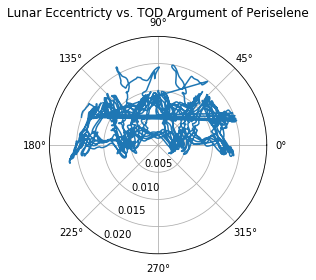

Current Time: 2019-03-29 13:41:00.022591; Elapsed Time: 95.33277751666667 minutes
Running LAN = 180.0
Number of Maneuvers: 12
Total Delta-V: 126.8654096408217 (m/s)
Mean Delta-V: 10.572117470068475 (m/s)
Standard Deviation of Delta-V: 0.3637860311390083 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,1 Apr 2021 13:53:40.781000012,10.675848
1,2,Sequence0.Target_Sequence.Mnvr_2,1 Apr 2021 16:52:57.447938561,10.438207
2,3,Sequence1.Target_Sequence.Mnvr_1,3 Jun 2021 12:51:35.913061097,9.671988
3,4,Sequence1.Target_Sequence.Mnvr_2,3 Jun 2021 15:53:05.785036052,10.008788
4,5,Sequence2.Target_Sequence.Mnvr_1,24 Aug 2021 05:47:23.690364331,10.841901
5,6,Sequence2.Target_Sequence.Mnvr_2,24 Aug 2021 08:48:01.764930818,10.770081
6,7,Sequence3.Target_Sequence.Mnvr_1,14 Nov 2021 02:52:50.770268112,10.814608
7,8,Sequence3.Target_Sequence.Mnvr_2,14 Nov 2021 05:53:29.564377248,10.742496
8,9,Sequence4.Target_Sequence.Mnvr_1,4 Feb 2022 00:09:44.939349234,10.771025
9,10,Sequence4.Target_Sequence.Mnvr_2,4 Feb 2022 03:10:23.098482937,10.698907


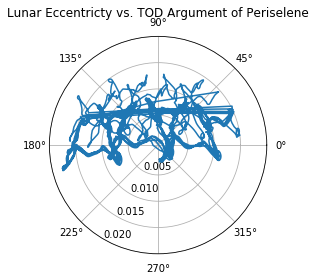

Current Time: 2019-03-29 15:09:09.853059; Elapsed Time: 183.49661865000002 minutes
Running LAN = 225.0
Number of Maneuvers: 12
Total Delta-V: 130.42648873912975 (m/s)
Mean Delta-V: 10.868874061594147 (m/s)
Standard Deviation of Delta-V: 0.12162846047513522 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,12 Apr 2021 22:53:08.385308646,10.776452
1,2,Sequence0.Target_Sequence.Mnvr_2,13 Apr 2021 01:54:20.141206566,10.685106
2,3,Sequence1.Target_Sequence.Mnvr_1,3 Jul 2021 20:51:40.559518052,11.009796
3,4,Sequence1.Target_Sequence.Mnvr_2,3 Jul 2021 23:52:42.159291890,10.929952
4,5,Sequence2.Target_Sequence.Mnvr_1,23 Sep 2021 19:03:22.555383105,10.729289
5,6,Sequence2.Target_Sequence.Mnvr_2,23 Sep 2021 22:04:20.764729340,11.095448
6,7,Sequence3.Target_Sequence.Mnvr_1,14 Dec 2021 17:48:44.628829356,10.974523
7,8,Sequence3.Target_Sequence.Mnvr_2,14 Dec 2021 20:49:37.602284327,10.899154
8,9,Sequence4.Target_Sequence.Mnvr_1,6 Mar 2022 16:45:43.948311850,10.895877
9,10,Sequence4.Target_Sequence.Mnvr_2,6 Mar 2022 19:46:34.554672264,10.823711


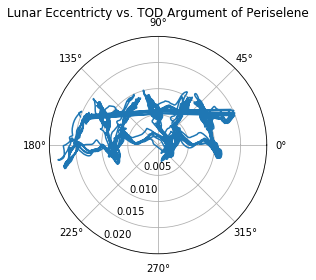

Current Time: 2019-03-29 15:37:49.254831; Elapsed Time: 212.15331485 minutes
Running LAN = 270.0
Number of Maneuvers: 12
Total Delta-V: 123.32206690284102 (m/s)
Mean Delta-V: 10.276838908570085 (m/s)
Standard Deviation of Delta-V: 2.297169759872604 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,15 Apr 2021 08:00:00.271224000,10.771514
1,2,Sequence0.Target_Sequence.Mnvr_2,15 Apr 2021 11:00:07.344565384,11.032509
2,3,Sequence1.Target_Sequence.Mnvr_1,5 Jul 2021 15:14:38.375963220,10.756497
3,4,Sequence1.Target_Sequence.Mnvr_2,5 Jul 2021 18:14:54.361907147,10.968249
4,5,Sequence2.Target_Sequence.Mnvr_1,25 Sep 2021 09:25:04.061823141,10.869068
5,6,Sequence2.Target_Sequence.Mnvr_2,25 Sep 2021 12:24:59.005868800,11.085977
6,7,Sequence3.Target_Sequence.Mnvr_1,5 Dec 2021 08:01:26.651162628,11.751801
7,8,Sequence3.Target_Sequence.Mnvr_2,5 Dec 2021 11:03:47.874218587,11.423544
8,9,Sequence4.Target_Sequence.Mnvr_1,7 Jan 2022 02:32:34.700434431,5.324137
9,10,Sequence4.Target_Sequence.Mnvr_2,7 Jan 2022 05:33:59.966618020,5.560478


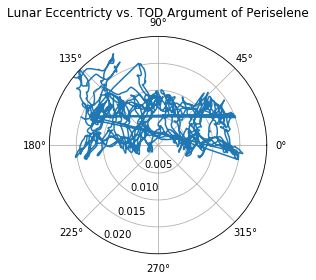

Current Time: 2019-03-29 19:57:21.681309; Elapsed Time: 471.69375615 minutes
Running LAN = 315.0
Number of Maneuvers: 12
Total Delta-V: 104.52142145371842 (m/s)
Mean Delta-V: 8.710118454476534 (m/s)
Standard Deviation of Delta-V: 3.396658378215839 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,6 Apr 2021 07:34:40.004175454,12.084185
1,2,Sequence0.Target_Sequence.Mnvr_2,6 Apr 2021 10:36:13.127482024,11.750222
2,3,Sequence1.Target_Sequence.Mnvr_1,9 May 2021 20:36:28.208348494,5.625707
3,4,Sequence1.Target_Sequence.Mnvr_2,9 May 2021 23:38:01.870232580,5.411671
4,5,Sequence2.Target_Sequence.Mnvr_1,24 Jul 2021 10:17:55.059351545,12.155378
5,6,Sequence2.Target_Sequence.Mnvr_2,24 Jul 2021 13:19:57.781867467,11.835385
6,7,Sequence3.Target_Sequence.Mnvr_1,27 Aug 2021 02:00:46.924904779,5.322631
7,8,Sequence3.Target_Sequence.Mnvr_2,27 Aug 2021 05:02:30.979966082,5.548386
8,9,Sequence4.Target_Sequence.Mnvr_1,10 Nov 2021 15:50:49.479226902,12.125895
9,10,Sequence4.Target_Sequence.Mnvr_2,10 Nov 2021 18:52:54.839063838,11.802685


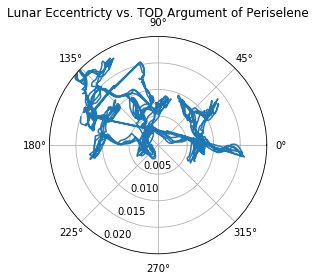

Current Time: 2019-03-29 20:15:53.063916; Elapsed Time: 490.2167996 minutes
Running LAN = 360.0
Number of Maneuvers: 12
Total Delta-V: 122.07439337146799 (m/s)
Mean Delta-V: 10.172866114288999 (m/s)
Standard Deviation of Delta-V: 1.2691733316373204 (m/s)


,Maneuver Number,Segment,Start Time,Delta V
0,1,Sequence0.Target_Sequence.Mnvr_1,27 Mar 2021 04:39:01.762111126,9.625099
1,2,Sequence0.Target_Sequence.Mnvr_2,27 Mar 2021 07:40:38.215912796,9.469610
2,3,Sequence1.Target_Sequence.Mnvr_1,17 Jun 2021 02:39:07.909215303,10.767999
3,4,Sequence1.Target_Sequence.Mnvr_2,17 Jun 2021 05:39:49.595246298,10.698265
4,5,Sequence2.Target_Sequence.Mnvr_1,7 Sep 2021 02:52:49.487992059,10.687506
5,6,Sequence2.Target_Sequence.Mnvr_2,7 Sep 2021 05:53:24.674670488,10.609622
6,7,Sequence3.Target_Sequence.Mnvr_1,28 Nov 2021 03:19:26.796752814,10.640824
7,8,Sequence3.Target_Sequence.Mnvr_2,28 Nov 2021 06:19:55.933202289,10.548709
8,9,Sequence4.Target_Sequence.Mnvr_1,2 Mar 2022 00:31:31.401001655,11.577832
9,10,Sequence4.Target_Sequence.Mnvr_2,2 Mar 2022 03:33:31.229681179,11.775867


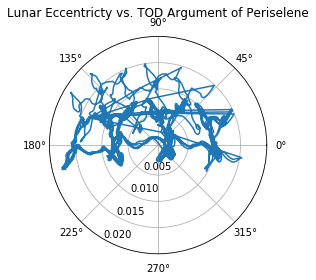

Current Time: 2019-03-29 20:37:08.211309; Elapsed Time: 511.46925615 minutes


In [69]:
try:
    sys.path.insert(0, os.path.abspath('..')) #Works for local
    #****** Enable this block to generate Summary_Report.csv ******#
    print("Root directory path: ", os.path.abspath('..'))
    %run ./KARI_wSTK_PIDsaved.ipynb
    STK_pid = p
    processSTK = psutil.Process(STK_pid)
    processSTK.kill()
    
    #****** Enable this block to test Summary_Report.csv ******#
    #Folder and File name relative to adam_home/data/
    #STKdata_folder = '\\KARI_withSTKwrapper_2019_03_06\\Summary_Report.csv'
    #from adam import adam_config
    #ADAMpaths = adam_config.setPaths.initPaths(os.path.abspath('..'))
    #csvPath = ADAMpaths[1] + STKdata_folder
    #csvData = pandas.read_csv(csvPath)
    #print("LOCAL")
except:
    sys.path.insert(0, os.path.abspath('.')) #Works for Travis CI
    #print("Root directory path: ", os.path.abspath('.'))
    from adam import adam_config
    
    #Folder and File name relative to adam_home/
    STKdata_folder = '/KARI/2019_04_01/Summary_Report 100 km-75x75.csv'
    ADAMpaths = adam_config.setPaths.initPaths(os.path.abspath('..')) #adam_home path
    csvPath = ADAMpaths[1] + STKdata_folder
    csvData = pandas.read_csv(csvPath)
    #print("REMOTE")    

**Method Testing** The following cells should only be run if you are testing the previous cells for errors.<br>
The CSV file being tested here was generated on Windows Platform. We are bypassing TravisCI<br>
and checking that the numbers match the file uploaded to the Repository.<br>
If the numbers match, we will allow TravisCI to pass the notbeook.<br>

In [77]:
def csvExist(csvPath):
    '''
    This will test if the file exists.
    >>> assert csvExist(csvPath)==True
    '''

    return os.path.exists(csvPath) == 1

In [78]:
def csvEmpty(csvPath):
    '''
    This will test if the file is empty and tests the size of the file in bytes.
    >>> assert csvEmpty(csvPath)==False
    '''
    return os.stat(csvPath).st_size==0

In [89]:
def csvShape(csvData):
    '''
    This will test the number of rows and columns in the file.
    >>> assert csvShape(csvData)==(9, 6)
    '''
    return csvData.shape

In [79]:
def csvLAN(csvData):
    '''
    This will test if the values in LAN (deg) is expected.
    >>> assert csvLAN(csvData)==0.0
    '''
    return csvData.loc[0,'LAN (deg)']

In [80]:
def csvNMan(csvData):
    '''
    This will test if the values in the file are as expected.
    >>> assert csvNMan(csvData)==12
    '''
    return csvData.loc[0,'Number Maneuvers']

In [90]:
# add this line at the end of the notebook
doctest.testmod(verbose=True)

Trying:
    assert csvEmpty(csvPath)==False
Expecting nothing
ok
Trying:
    assert csvExist(csvPath)==True
Expecting nothing
ok
Trying:
    assert csvLAN(csvData)==0.0
Expecting nothing
ok
Trying:
    assert csvMeanDelV(csvData)==4.927335933687437
Expecting nothing
**********************************************************************
File "__main__", line 4, in __main__.csvMeanDelV
Failed example:
    assert csvMeanDelV(csvData)==4.927335933687437
Exception raised:
    Traceback (most recent call last):
      File "C:\Users\macuser\Anaconda3\lib\doctest.py", line 1329, in __run
        compileflags, 1), test.globs)
      File "<doctest __main__.csvMeanDelV[0]>", line 1, in <module>
        assert csvMeanDelV(csvData)==4.927335933687437
    AssertionError
Trying:
    assert csvNMan(csvData)==12
Expecting nothing
ok
Trying:
    assert csvShape(csvData)==(9, 6)
Expecting nothing
ok
Trying:
    assert csvStdDev(csvData)==1.0559566325090377
Expecting nothing
******************************

TestResults(failed=3, attempted=9)

In [23]:
#Restore saved information after kernel restart and cell output are cleared
#%store -r summaryReportDF
#print(summaryReportDF)